In [92]:
import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

In [93]:
#funzioni
#Pt 1
def Lambda(x,Z,F,m): # nm
    L = x*F/(Z*m) *M  # M: normalizzazione L[nm]
    return L

#Pt 2
def Beta(x,Z,d,L):
    B = pi*d*x/(L*Z) *M
    return B
def Intensity(B,I0):
    I = I0*np.power(np.sin(B)/B,2)
    return I

In [94]:
#errore
#Pt 1

def SigmaLambda(x,sx,Z,sZ,F,sF,m):
    dx = Lambda(sx,Z, F,m) 
    dF = Lambda( x,Z,sF,m) 
    dZ = F*x/np.power(Z,2)*sZ *M
    sL = np.sqrt(np.power(dx,2) + np.power(dZ,2) + np.power(dF,2) )
    return sL


#Pt 2
def SigmaBeta(x,sx,Z,sZ,d,sd,L,sL):
    dx = Beta(sx,Z, d,L)
    dd = Beta( x,Z,sd,L)
    dZ = pi*d*x/(L*np.power(Z,2))*sZ *M
    dL = pi*d*x/(Z*np.power(L,2))*sL *M
    sB = np.sqrt(np.power(dx,2) + np.power(dZ,2) + np.power(dd,2) + np.power(dL,2) ) 
    return sB

def SigmaIntensity(B,sB,I0,sI0):
    dB = 2*I0*np.sin(B)*( B*np.cos(B)-np.sin(B) )/np.power(B,3)*sB
    dI0 = Intensity(B,sI0)
    sI = np.sqrt( np.power(dB,2) + np.power(dI0,2) )
    return sI

In [95]:
# Parte 1
Z = 852     # mm 
sZ  = 2

In [96]:
# Lettura 1
df1   = pd.read_csv('data1.csv')
m     = np.asarray(df1.iloc[:,0]) # m del minimo
F     = np.asarray(df1.iloc[:,1]) #fenditura

sF    = np.full(7,0.001) # sigma a caso
# sigma a caso
df1

,m,d[mm],I0[mV],I1[mV],I2[mV],I3[mV],I4[mV],x0[mm],x1[mm],x2[mm],x3[mm],x4[mm]
0,1.00,0.2,6400,55,47,55,57,10.90,8.39,8.34,7.13,7.00
1,1.00,0.2,6400,31,27,24,28,10.90,13.67,13.84,14.40,14.42
2,1.00,0.4,7280,70,68,72,78,8.28,6.98,7.00,7.07,7.09
3,1.00,0.4,7280,165,154,152,158,8.28,10.41,10.44,10.53,10.54
4,1.22,0.6,8020,71,68,76,82,10.84,9.09,9.01,9.00,8.98
5,1.22,0.4,8850,46,44,42,45,8.74,7.09,7.06,6.99,6.97
6,1.22,0.4,8850,122,121,124,128,8.74,10.16,10.15,10.10,10.07


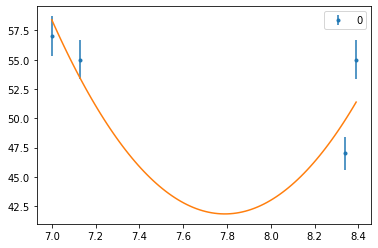

Xmin =  7.79020100244295
a =  26.544319189827 +- 42.197349513262836
b =  -413.5711639235119 +- 650.7287235289989
COV =  -27458.50842423222


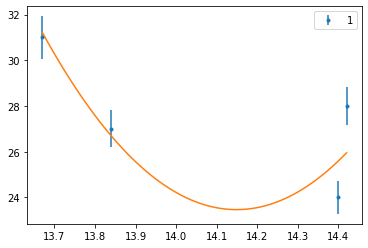

Xmin =  14.149020051298441
a =  33.84698917665372 +- 37.12113813568784
b =  -957.8034570731096 +- 1044.7802331922014
COV =  -38783.12020817429


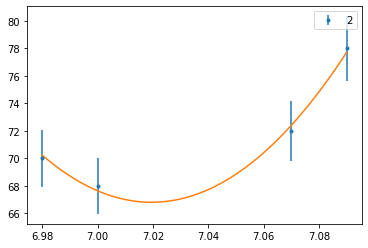

Xmin =  7.019536098024523
a =  2194.2954117289596 +- 364.89929639478476
b =  -30805.87170472203 +- 5133.828273832293
COV =  -1873328.4755602134


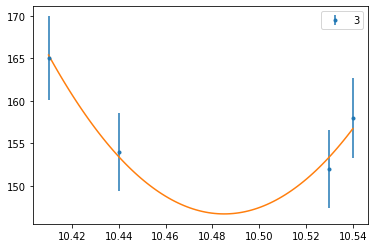

Xmin =  10.4850141236392
a =  3322.678280398481 +- 859.8842050151433
b =  -69676.65739657456 +- 18019.415498933515
COV =  -15494602.640770683


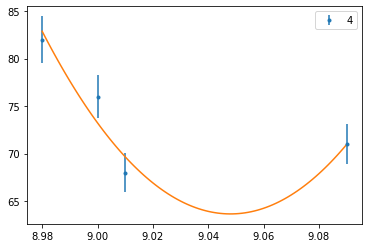

Xmin =  9.048066012482337
a =  4150.8981421683175 +- 1682.7784547442996
b =  -75115.20080285847 +- 30426.064439746053
COV =  -51200282.21804577


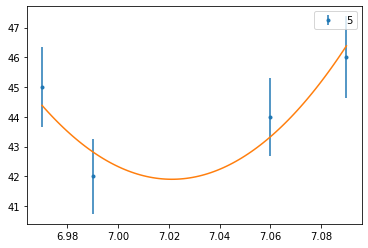

Xmin =  7.021202331030122
a =  946.870179082335 +- 548.9284385030958
b =  -13296.334217111598 +- 7717.157762470969
COV =  -4236160.896964393


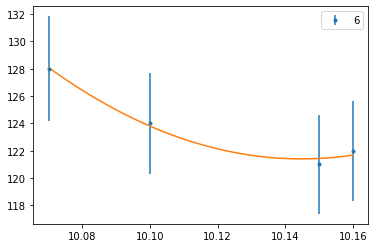

Xmin =  10.144798316935747
a =  1195.8317618342264 +- 405.51916556692896
b =  -24262.944089588338 +- 8204.76626096025
COV =  -3327188.336383236


In [97]:
ArrX = np.asarray(df1.iloc[:,8:12])
ArrY = np.asarray(df1.iloc[:,3:7])
ArrsX = ArrX*0.005
ArrsY = ArrY*0.03

Xmin = np.asarray([])
sXmin = np.asarray([])

def Parabola(x,a,b,c):
    return a*x**2 + b*x +c
def SigmaVertice(a,b,sa,sb,COV):
    da = -b/(2*a**2) *sa
    db = -1/(2*a) *sb
    CORR = 1/(2*a**2) *COV
    #CORR = 0
    return np.sqrt(np.power(da,2) + np.power(db,2) + 2*CORR )

for f in range(len(ArrX)):

    X  = ArrX[f]
    sX = ArrsX[f]
    Y  = ArrY[f]
    sY = ArrsY[f]
    
    x = np.linspace(np.min(X),np.max(X),100)
    [a,b,c],pcov = s.optimize.curve_fit(Parabola,X,Y,sigma = sY,absolute_sigma = False)
    [sa,sb,sc] = np.sqrt(np.diag(pcov))
    plt.errorbar(X,Y,sY, ls='', marker='.',label = '{}'.format(f))
    plt.plot(x,Parabola(x,a,b,c))
    plt.legend()
    plt.show()

    Value = -b/(2*a)
    sValue = SigmaVertice(a,b,sa,sb,pcov[0][1])
    print('Xmin = ',Value)
    print('a = ',a,'+-',sa)
    print('b = ',b,'+-',sb)
    print('COV = ',pcov[0][1])
    #print(pcov)
    Xmin = np.append(Xmin,Value)                         
    sXmin = np.append(sXmin,sValue)

Xmin =  np.abs(Xmin  - df1.iloc[:,7])


Xmin[0] = Xmin[0]-0.5
Xmin[2] = Xmin[2]-0.5
Xmin[3] = Xmin[3]-0.5
Xmin[4] = Xmin[4]-0.5

In [98]:
for u in range(len(Xmin)):
    print(Xmin[u],'+-',sXmin[u])

2.60979899755705 +- 16.26769655953096
3.249020051298441 +- 21.098584894835962
0.7604639019754762 +- 1.530362144712524
1.7050141236392005 +- 3.648556723629782
1.2919339875176625 +- 4.890352453582163
1.718797668969878 +- 5.33381501129104
1.4047983169357465 +- 4.612716255780002


In [99]:
sXmin = np.full(len(Xmin),0.04)

Array_L  = Lambda(Xmin,Z,F,m)
Array_sL = SigmaLambda(Xmin,sXmin,Z,sZ,F,sF,m)
L = np.sum(Array_L)/len(Array_L)
sL = my.sqrt_sum(Array_sL)/len(Array_sL)

print(Array_L)
print('Lambda =',L,' +- ',sL)

0    612.628873
1    762.680763
2    357.025306
3    800.476114
4    745.748088
5    661.432182
6    540.598136
Name:  x0[mm], dtype: float64
Lambda = 640.0842089825221  +-  6.297951708873048


In [100]:
# Parte 2 
L = 640
sL = 8
d = 0.4  # mm 
sd  = 0.001*d

#Parametri ricavati da fit 
x_offset = 6.0006
I0 = 7065.942      # misurata nel massimo
sI0 = 0.0005*I0 + 3

In [101]:
# Lettura 2
df2 = pd.read_csv('data2.csv')
xmis  = np.asarray(df2.iloc[:,0]) - x_offset
Imis  = np.asarray(df2.iloc[:,1])

sxmis = np.full(41,0.0) # sigma a caso
sImis = Imis*0.0005 + 3

In [102]:
# Array per andamento Teorico
x = np.linspace(-6,6,1000) #mm
sx = np.zeros(1000)
print('Z = ',Z,' mm')
print('d = ',d,' mm')
print('L = ',L,' nm')

Z =  852  mm
d =  0.4  mm
L =  640  nm


In [103]:
B  = Beta(x,Z,d,L)
sB = SigmaBeta(x,sx,Z,sZ,d,sd,L,sL)

I  = Intensity(B,I0) 
sI = SigmaIntensity(B,sB,I0,sI0)

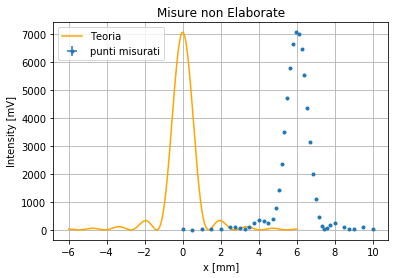

In [104]:
#Grafico intensità

plt.plot(x,I,color='orange',label='Teoria') #Teoria
plt.errorbar(xmis + x_offset,Imis, yerr=0, xerr=0, ls='', marker='.', label='punti misurati') #Misurati


plt.title('Misure non Elaborate')
plt.xlabel('x [mm]')
plt.ylabel('Intensity [mV]')
plt.grid()
plt.legend()

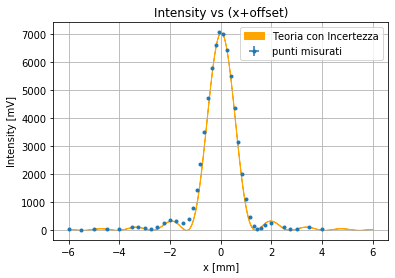

In [105]:
#Teorico Incertezza

plt.errorbar(xmis,Imis, yerr=sImis, xerr=0, ls='', marker='.', label='punti misurati')

plt.fill_between(x,I+sI/2,y2 = I-sI/2, color = 'orange',label = 'Teoria con Incertezza')


#plt.ylim(0,1000)
plt.title('Intensity vs (x+offset)')
plt.xlabel('x [mm]')
plt.ylabel('Intensity [mV]')
plt.grid()
plt.legend()

In [106]:
#Chi quadro

Xdata  = xmis
sXdata = sxmis

Ydata = Imis
sYdata = sImis

Yexp  = Intensity(Beta(Xdata,Z,d,L),I0)
sYexp = SigmaIntensity( Beta(Xdata,Z,d,L), SigmaBeta(Xdata,sXdata,Z,sZ,d,sd,L,sL), I0,sI0)

#Yerror = sImis
Yerror = np.sqrt( np.power(sYdata,2) + np.power(sYexp,2) ) # Sta cosa non so troppo convinto che è giusta ma stica

chi2 = np.sum( ( (Yexp - Ydata)/Yerror )**2 )
print('chi2 = ',chi2)

chi2 =  1760.8153954630393


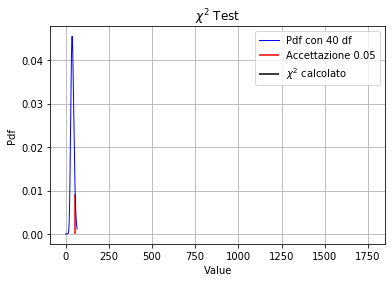

0

In [107]:
#Grafico del fit
my.chi_graph(chi2,r'$\chi^2$ calcolato',40)

In [80]:
#Lettura 2
df3 = pd.read_csv('data3.csv')
m  = np.asarray(df3.iloc[:,0])
Min  = np.asarray(df3.iloc[:,1]) #in mm
sMin = np.full(len(Min),10)      #in mm

def fit(x,m,c):
    return m*x + c
[A,c],pcov = s.optimize.curve_fit(fit,m,Min,sigma = sMin,absolute_sigma = True)
[sA,sc] = np.sqrt(np.diag(pcov))


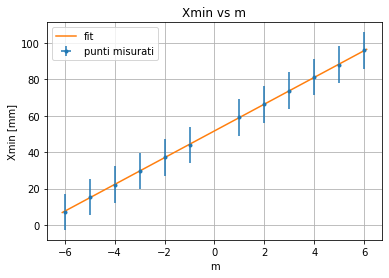

In [81]:
x=np.linspace(-6.1,6.1,100)
plt.errorbar(m,Min, yerr=sMin, xerr=0, ls='', marker='.', label='punti misurati')
plt.plot(x,fit(x,A,c),label='fit')
plt.title('Xmin vs m')
plt.ylabel('Xmin [mm]')
plt.xlabel('m')
plt.grid()
plt.legend()

In [82]:
def Capello(L,Z,A):
    M=1000000 
    return Z*L/(A*M)
def SigmaCapello(L,Z,A,sL,sZ,sA):
    dL = Capello(sL, Z,A)
    dZ = Capello( L,sZ,A)
    dA = -Z*L/(M*A**2) *sA
    return my.sqrt_sum(dL,dZ,dA)

Cap = Capello(L,Z,A)
sCap = SigmaCapello(L,Z,A,sL,sZ,sA)


print('Z = ',Z,' mm')
print('L = ',L,' nm')
print('=> F = ',Cap,'+-',sCap,' mm')

Z =  852  mm
L =  640  nm
=> F =  0.07417411465293437 +- 0.007513377844406776  mm
